In [1]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from pyrsimg import readTiff, imgShow
import pandas as pd

In [2]:
# path_atl13 = 'E:/icesat2_data/ATL13_20230728052408_05812001_006_01_.h5'
# path_atl13 = 'E:/icesat2_data/icesat2/py/2022/processed_ATL13_20220125214246_05291401_006_01.h5'
path_atl13 = r'E:\lakes\LMJD\data\processed_ATL13_20200513062142_07290701_006_01.h5'
path_rsimg = r'E:\lakes\LMJD\LMJD.tif'

In [3]:
!h5ls $path_atl13/gt1l

anom_ssegs               Group
atl13refid               Dataset {57/Inf}
bottom_lat               Dataset {57/Inf}
bottom_lon               Dataset {57/Inf}
cloud_flag_asr_atl09     Dataset {57/Inf}
cloud_flag_atm_atl09     Dataset {57/Inf}
cycle_number             Dataset {57/Inf}
delta_time               Dataset {57/Inf}
err_ht_water_surf        Dataset {57/Inf}
err_slope_trk            Dataset {57/Inf}
ht_ortho                 Dataset {57/Inf}
ht_water_surf            Dataset {57/Inf}
ice_flag                 Dataset {57/Inf}
inland_water_body_id     Dataset {57/Inf}
inland_water_body_region Dataset {57/Inf}
inland_water_body_size   Dataset {57/Inf}
inland_water_body_source Dataset {57/Inf}
inland_water_body_type   Dataset {57/Inf}
layer_flag_atl09         Dataset {57/Inf}
met_ts_atl09             Dataset {57/Inf}
met_wind10_atl09         Dataset {57/Inf}
met_wind10_atl13         Dataset {57/Inf}
qf_bckgrd                Dataset {57/Inf}
qf_bias_em               Dataset {57/Inf}
qf_

In [4]:
with h5py.File(path_atl13,"r") as setp_atl13:
    #gt1l
    lat_gt1l=setp_atl13 ['gt1l/bottom_lat'][:]
    lon_gt1l=setp_atl13['gt1l/bottom_lon'][:]
    ht_gt1l=setp_atl13['gt1l/ht_water_surf'][:]
    #group attributes
    beam_type_gt1l=setp_atl13['gt1l'].attrs['atlas_beam_type'].decode()
    beam_type_gt1r=setp_atl13['gt1r'].attrs['atlas_beam_type'].decode()
    beam_type_gt3r=setp_atl13['gt3r'].attrs['atlas_beam_type'].decode()
    #gt1r
    lat_gt1r=setp_atl13 ['gt1r/bottom_lat'][:]
    lon_gt1r=setp_atl13['gt1r/bottom_lon'][:]
    ht_gt1r=setp_atl13['gt1r/ht_water_surf'][:]
    beam_type_gt1r=setp_atl13['gt1r'].attrs['atlas_beam_type'].decode()
    #gt3r
    # lat_gt3r=setp_atl13 ['gt3r/bottom_lat'][:]
    # lon_gt3r=setp_atl13['gt3r/bottom_lon'][:]
    # ht_gt3r=setp_atl13['gt3r/ht_water_surf'][:]
    #轨道信息
    cycle=setp_atl13['orbit_info/cycle_number'][0]
    track=setp_atl13['orbit_info/rgt'][0]
    orient=setp_atl13['orbit_info/sc_orient'][0]
    #质量信息
    qf_bckgrd=setp_atl13['gt1r/qf_bckgrd'][:]
    qf_bias_em=setp_atl13['gt1r/qf_bias_em'][:]
    qf_bias_fit=setp_atl13['gt1r/qf_bias_fit'][:]
    stdev_water_surf=setp_atl13['gt1r/stdev_water_surf'][:]
#remote sensing image
rsimg = readTiff(path_rsimg)

    

MemoryError: Unable to allocate 3.17 GiB for an array with shape (6, 7798, 9082) and data type float64

Text(0.5, 1.0, 'icesat2')

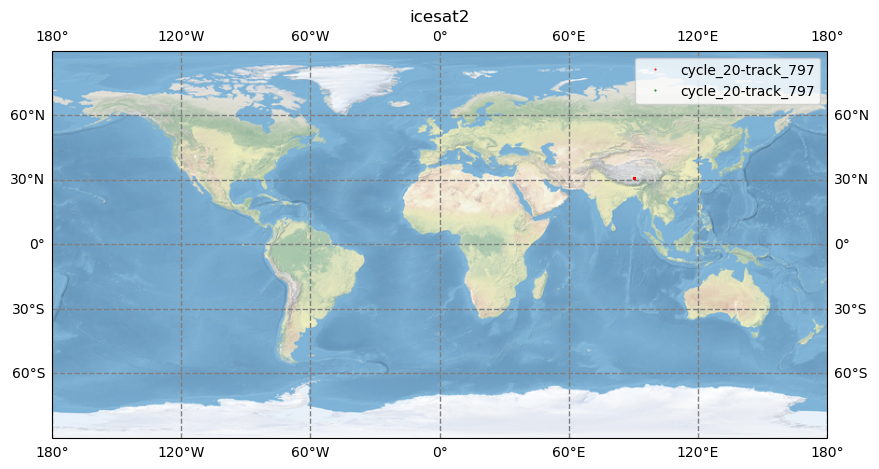

In [11]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(10, 10))
orbit_isat = 'cycle_'+str(cycle)+'-track_'+str(track)
ax3 = fig.add_subplot(111, projection=proj); 
ax3.stock_img()
ax3.set_xlim(left=-180,right=180)
ax3.set_ylim(bottom=-90,top=90)
ax3.plot(lon_gt1l,lat_gt1l,marker='.',markersize=1,linewidth=0.0,label=orbit_isat,color='red')
ax3.plot(lon_gt1r,lat_gt1r,marker='.',markersize=1,linewidth=0.0,label=orbit_isat,color='green')
# ax3.plot(lon_gt3r,lat_gt3r,marker='.',markersize=1,linewidth=0.0,label=orbit_isat,color='blue')
ax3.gridlines(draw_labels=True,linewidth=1,color='gray',linestyle='--')
ax3.legend()
plt.title('icesat2')

C:\Users\28618\AppData\Local\Temp\ipykernel_15616\2027469976.py:9: RuntimeWarning: Mean of empty slice.
  ht_gt1l[ids_gt1l].mean()
f:\miniconda\miniconda3\py310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


nan

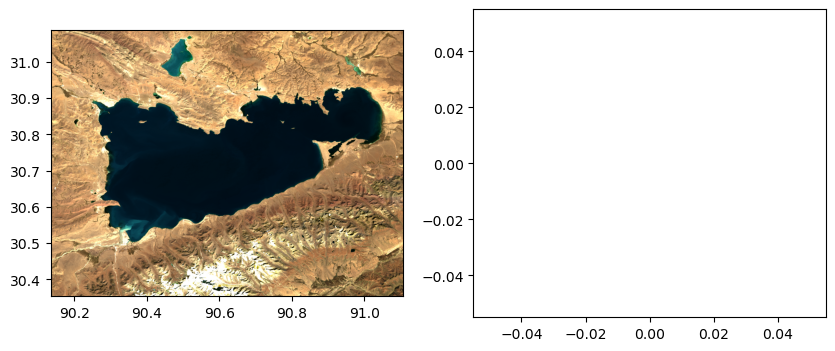

In [12]:
#gt1l
ids_gt1l=np.where((lat_gt1l>33.52)&(lat_gt1l<34.10)&(lon_gt1l>81.18)&(lon_gt1l<81.52)&(ht_gt1l<5000))
#ids_gt1r=np.where((lat_gt1r>24.50)&(lat_gt1r<24.95)&(lon_gt1r>102.00)&(lon_gt1r<103.00)&(ht_gt1r<5000))
# ids_gt3r=np.where((lat_gt3r>24.50)&(lat_gt3r<24.95)&(lon_gt3r>102.00)&(lon_gt3r<103.00)&(ht_gt3r<5000))
fig,ax=plt.subplots(1,2,figsize=(10,4))
imgShow(rsimg.array,extent=rsimg.geoextent,clip_percent=5,ax=ax[0])
ax[0].scatter(lon_gt1l[ids_gt1l],lat_gt1l[ids_gt1l],s=1.5,color='red')
ax[1].plot(lat_gt1l[ids_gt1l],ht_gt1l[ids_gt1l],'r.')
ht_gt1l[ids_gt1l].mean() 

4691.33

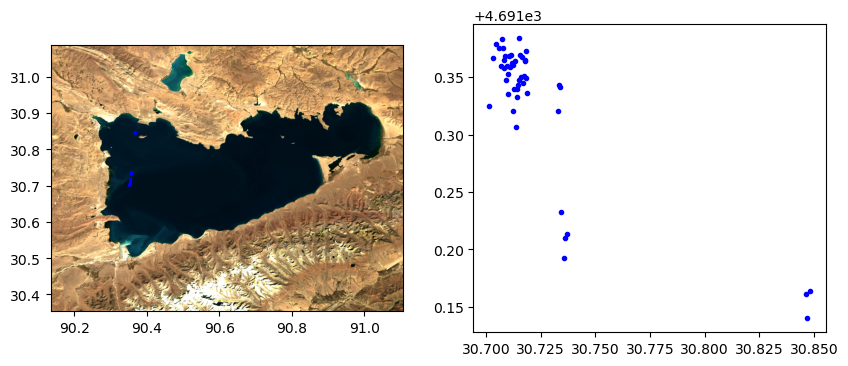

In [ ]:
#gt3r
ids_gt3r=np.where((lat_gt3r>30.70)&(lat_gt3r<30.85)&(lon_gt3r>90.25)&(lon_gt3r<91)&(ht_gt3r<5000))
fig,ax=plt.subplots(1,2,figsize=(10,4))
imgShow(rsimg.array,extent=rsimg.geoextent,clip_percent=5,ax=ax[0])
ax[0].scatter(lon_gt3r[ids_gt3r],lat_gt3r[ids_gt3r],s=1.5,color='blue')
ax[1].plot(lat_gt3r[ids_gt3r],ht_gt3r[ids_gt3r],'b.')
ht_gt3r[ids_gt3r].mean()

57


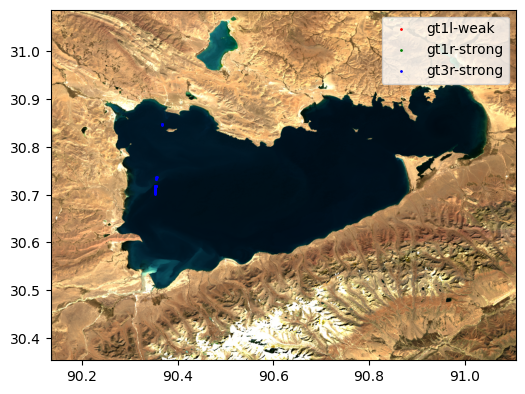

In [ ]:
#gt1l vs gt1r,gt3r
ids_gt1l=np.where((lat_gt1l>30.70)&(lat_gt1l<30.85)&(lon_gt1l>90.25)&(lon_gt1l<91)&(ht_gt1l<5000))
print(ht_gt1l.size)
ids_gt1r=np.where((lat_gt1r>30.70)&(lat_gt1r<30.85)&(lon_gt1r>90.25)&(lon_gt1r<91)&(ht_gt1r<5000))
ids_gt3r=np.where((lat_gt3r>30.70)&(lat_gt3r<30.85)&(lon_gt3r>90.25)&(lon_gt3r<91)&(ht_gt3r<5000))
fig,ax=plt.subplots(1,1,figsize=(6,6))
imgShow(rsimg.array,extent=rsimg.geoextent,clip_percent=5,ax=ax)
ax.scatter(x=lon_gt1l[ids_gt1l],y=lat_gt1l[ids_gt1l],s=1,color='red',label='gt1l-'+beam_type_gt1l)
ax.scatter(x=lon_gt1r[ids_gt1r],y=lat_gt1r[ids_gt1r],s=1,color='green',label='gt1r-'+beam_type_gt1r)
ax.scatter(x=lon_gt3r[ids_gt3r],y=lat_gt3r[ids_gt3r],s=1,color='blue',label='gt3r-'+beam_type_gt3r)
plt.legend()
